In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

### Running Linear regression on Medical Cost Dataset publically available from Kaggle

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
print(df.shape)
print(df.head())
print()
print(df.info())




(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [61]:
feature= df.drop("charges",axis=1)
target= df["charges"]
print(feature.shape)
print(target.shape)



(1338, 6)
(1338,)


# one hot encoding for categorical variable



In [44]:
# Used to one hot encode panda dataframe


 # No need to run this ,since i am doing it with normalization
# X_encoded = pd.get_dummies(feature)

# print(X_encoded.head(3))

# print(X_encoded.shape)

# Data Preprocessing Step
#### (Normalization and standardization)

<Axes: title={'center': 'bmi'}, ylabel='Frequency'>

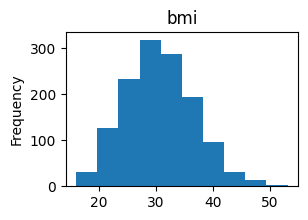

In [62]:
plt.figure(figsize=(3, 2))
plt.title("bmi")
feature["bmi"].plot(kind="hist")

<Axes: title={'center': 'age'}, ylabel='Frequency'>

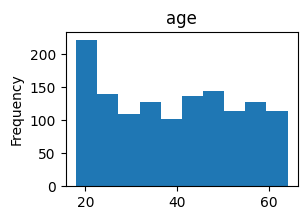

In [63]:
plt.figure(figsize=(3, 2))
plt.title("age")
feature["age"].plot(kind="hist")

In [64]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split

X_train_before_normalization, X_test_before_normalization, y_train_before_normalization, y_test_before_normalization= train_test_split(feature, target, test_size=0.15, random_state=42)



ct = make_column_transformer(
  (MinMaxScaler()  ,["age" ,"bmi","children"] ),
  (OneHotEncoder(handle_unknown="ignore") ,["sex" ,"smoker","region"])
)

ct.fit(X_train_before_normalization)

X_train = ct.transform(X_train_before_normalization)
X_test = ct.transform(X_test_before_normalization)
y_train = y_train_before_normalization
y_test=y_test_before_normalization



In [65]:
print("Training data shape" ,X_train.shape)
print("Training label shape" ,y_train.shape)
print()
print("Testing data shape" ,X_test.shape)
print("Testing label shape" ,y_test.shape)




Training data shape (1137, 11)
Training label shape (1137,)

Testing data shape (201, 11)
Testing label shape (201,)


In [49]:
# X= np.array(X_encoded)
# y=target

# print("Input shape" ,X.shape)
# print("ouput shape" ,y.shape)

# Splitting the data set into trainining and testing


In [66]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


print("Training input shape" ,X_train.shape)
print("Training output shape" ,y_train.shape)

print("Testing input shape" ,X_test.shape)
print("Testong oputput shape " ,y_test.shape)


Training input shape (1137, 11)
Training output shape (1137,)
Testing input shape (201, 11)
Testong oputput shape  (201,)


In [67]:
X_train= tf.constant( X_train,dtype=tf.float32)
y_train=tf.constant(y_train ,dtype=tf.float32)

X_test= tf.constant( X_test,dtype=tf.float32)
y_test=tf.constant(y_test ,dtype=tf.float32)

In [ ]:
# step1 . create a model

tf.random.set_seed(42)
model= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100 ,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    # tf.keras.layers.Dense( ,activation="relu"),

    tf.keras.layers.Dense(1)
])

#  Step2: Compile the Model
model.compile(loss=tf.keras.losses.mae ,optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) ,metrics=["mae"])

# step3
history= model.fit(X_train , y_train  ,epochs=250 ,verbose=1)






Epoch 1/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13390.7324 - mae: 13390.7324
Epoch 2/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13181.9639 - mae: 13181.9639
Epoch 3/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11983.0283 - mae: 11983.0283
Epoch 4/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9459.7422 - mae: 9459.7422
Epoch 5/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7939.2622 - mae: 7939.2622
Epoch 6/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7650.9639 - mae: 7650.9639
Epoch 7/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7393.5249 - mae: 7393.5249
Epoch 8/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7101.2031 - mae: 7101.2031
Epoch 9/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6741.0718 - mae: 6741.0718 
Epoch 10/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6271.7881 - mae: 6271.7881
Epoch 11/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5654.6646 - mae: 5654.6646 
Epoch 12/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [69]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

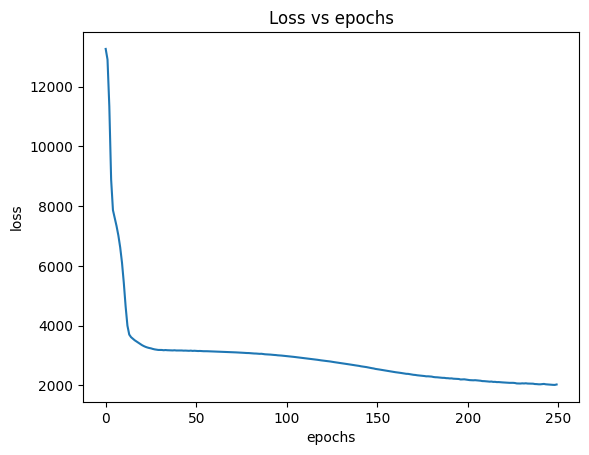

In [70]:
plt.title("Loss vs epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(history.history["loss"])

In [71]:
y_preds= model.predict(X_test)
print(y_preds.shape)
print(y_test.shape)


model.evaluate(X_test ,y_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
(201, 1)
(201,)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1875.6458 - mae: 1875.6458  


[1974.22998046875, 1974.22998046875]

# Finding **MAE** and **MSE**

In [72]:
def find_mae(y_test ,y_preds):
    predictions= tf.squeeze(y_preds)
    return tf.reduce_mean( tf.abs(predictions-y_test) )
    # print(predictions.shape)

def find_mse(y_test ,y_preds):
    predictions= tf.squeeze(y_preds)
    return tf.reduce_mean( tf.square(predictions-y_test) )


print("On average the insurance money is" ,tf.reduce_mean(y_train).numpy())


print("\nMean Absolute Error is",find_mae(y_test ,y_preds).numpy()   )
print("Mean Squared Error is" , find_mse(y_test ,y_preds).numpy() )


print("\n\nOn average the insurance money is around 13285\nand out model is off by" ,find_mae(y_test ,y_preds).numpy())

On average the insurance money is 13285.245

Mean Absolute Error is 1974.23
Mean Squared Error is 23230604.0


On average the insurance money is around 13285
and out model is off by 1974.23


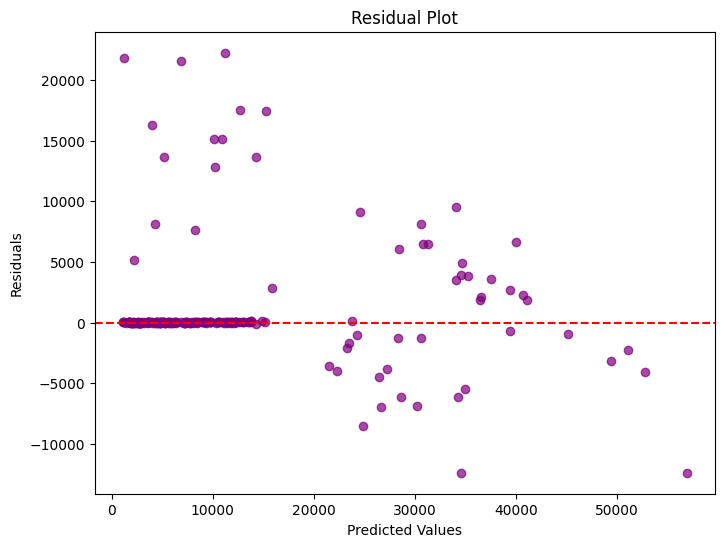

In [73]:
residuals = y_test - tf.squeeze(y_preds)

plt.figure(figsize=(8, 6))
plt.scatter(tf.squeeze(y_preds), residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Trying Early Stopping Callback